In [2]:
pip install sodapy

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sodapy import Socrata

In [4]:
domain = 'data.cdc.gov'

client = Socrata(domain, None)

In [5]:
# https://data.cdc.gov/resource/pwn4-m3yp.json
# Enter the information from those sections here

covid_dataset_identifier = 'pwn4-m3yp'
covid_results = client.get(covid_dataset_identifier)
covid_df = pd.DataFrame.from_dict(covid_results)
covid_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2023-02-23T00:00:00.000,AZ,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,2434631.0,3716.0,33042.0,39.0,23150,0
1,2022-12-22T00:00:00.000,LA,2022-12-15T00:00:00.000,2022-12-21T00:00:00.000,1507707.0,4041.0,18345.0,21.0,21397,0
2,2023-02-23T00:00:00.000,GA,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,3061141.0,5298.0,42324.0,88.0,6800,0
3,2023-03-30T00:00:00.000,LA,2023-03-23T00:00:00.000,2023-03-29T00:00:00.000,1588259.0,2203.0,18858.0,23.0,5347,0
4,2023-02-02T00:00:00.000,LA,2023-01-26T00:00:00.000,2023-02-01T00:00:00.000,1548508.0,5725.0,18572.0,47.0,4507,0


In [6]:
#inspecting the Information


covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         1000 non-null   object
 1   state                1000 non-null   object
 2   start_date           1000 non-null   object
 3   end_date             1000 non-null   object
 4   tot_cases            1000 non-null   object
 5   new_cases            1000 non-null   object
 6   tot_deaths           1000 non-null   object
 7   new_deaths           1000 non-null   object
 8   new_historic_cases   1000 non-null   object
 9   new_historic_deaths  1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [7]:
covid_df.describe()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,173,16,173,173,850,804,728,340,9,10
top,2023-04-27T00:00:00.000,AZ,2023-04-20T00:00:00.000,2023-04-26T00:00:00.000,0.0,0.0,0.0,0.0,0,0
freq,7,173,7,7,102,143,151,259,992,990


In [8]:
to_drop=['start_date','end_date','new_historic_cases','new_historic_deaths']

covid_df.drop(to_drop,inplace=True,axis=1)

In [9]:
covid_df = covid_df.rename(columns={'date_updated': 'Date'})
covid_df['Date']=pd.to_datetime(covid_df['Date'])
covid_df = covid_df.sort_values(by=['Date'])
covid_df = covid_df.rename(columns={'state':'State'})
covid_df = covid_df.rename(columns={'tot_deaths':'Total_Deaths', 'new_deaths':'New_Deaths'})
covid_df = covid_df.rename(columns={'tot_cases':'Total_Cases', 'new_cases':'New_Cases'})


In [10]:
covid_df

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
345,2020-01-23,AR,0.0,0.0,0.0,0.0
864,2020-01-23,CA,0.0,0.0,0.0,0.0
514,2020-01-23,AS,0.0,0.0,0.0,0.0
172,2020-01-23,AL,0.0,0.0,0.0,0.0
691,2020-01-23,AZ,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
863,2023-05-11,AZ,2474154.0,2608.0,33451.0,34.0
344,2023-05-11,AL,1659936.0,1297.0,21138.0,1.0
518,2023-05-11,AR,995043.0,657.0,13115.0,0.0
8,2023-05-11,FL,7572282.0,6937.0,88248.0,0.0


In [11]:
covid_df=covid_df[covid_df.Total_Cases.astype(float)>0]

In [12]:
pd.set_option('display.max_rows', None)

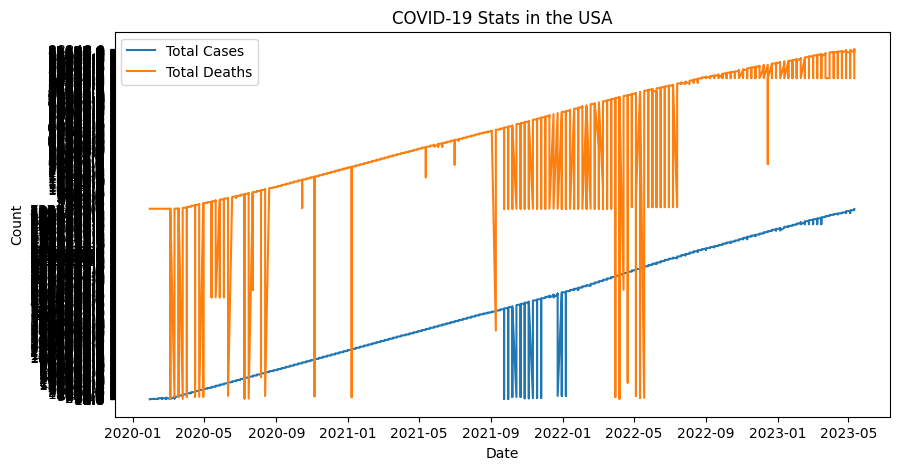

In [13]:
#Pandemic Plots

# Plot for COVID stats in the USA
plt.figure(figsize=(10, 5))
plt.plot(covid_df['Date'], covid_df['Total_Cases'], label='Total Cases')
plt.plot(covid_df['Date'], covid_df['Total_Deaths'], label='Total Deaths')
plt.title('COVID-19 Stats in the USA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

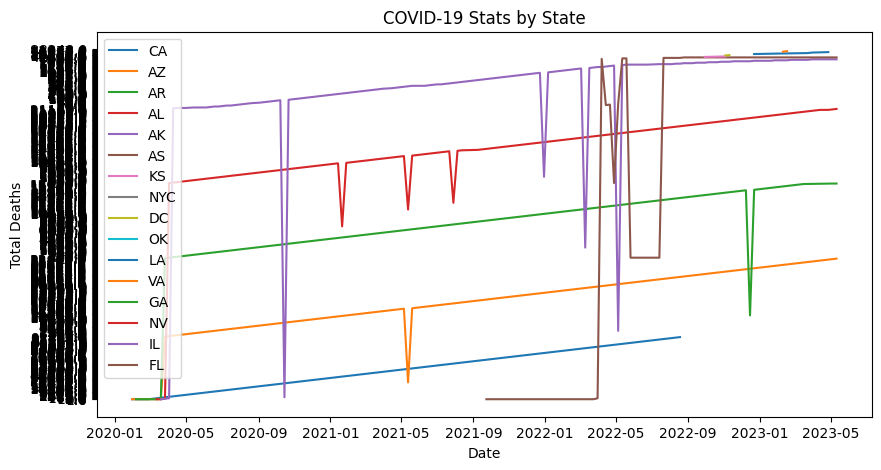

In [14]:
# Plot stats for each state
states = covid_df['State'].unique()
plt.figure(figsize=(10, 5))
for state in states:
    state_data = covid_df[covid_df['State'] == state]
    plt.plot(state_data['Date'], state_data['Total_Deaths'], label=state)
plt.title('COVID-19 Stats by State')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

In [15]:
covid_df['Disease']='Covid'

<ipython-input-15-fb3c3623a4da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['Disease']='Covid'


In [16]:


covid_df.head()

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Disease
865,2020-01-30,CA,2.0,2.0,0.0,0.0,Covid
692,2020-01-30,AZ,1.0,1.0,0.0,0.0,Covid
347,2020-02-06,AR,1.0,1.0,0.0,0.0,Covid
866,2020-02-06,CA,8.0,6.0,0.0,0.0,Covid
693,2020-02-06,AZ,1.0,0.0,0.0,0.0,Covid


In [17]:


#Information 2


dis1_dataset_identifier = 'bi63-dtpu'
dis1_results = client.get(dis1_dataset_identifier)
dis1_df = pd.DataFrame.from_dict(dis1_results)
dis1_df.head()

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8


In [18]:
dis1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             1000 non-null   object
 1   _113_cause_name  1000 non-null   object
 2   cause_name       1000 non-null   object
 3   state            1000 non-null   object
 4   deaths           1000 non-null   object
 5   aadr             1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [19]:
drop_columns=['aadr','_113_cause_name']

dis1_df.drop(drop_columns,inplace=True,axis=1)

In [20]:
dis1_df = dis1_df.rename(columns={'year': 'Year'})
dis1_df = dis1_df.sort_values(by=['Year'])
dis1_df = dis1_df.rename(columns={'state':'State'})
dis1_df = dis1_df.rename(columns={'deaths':'Total_Deaths'})

In [21]:
dis1_df.head()

,Year,cause_name,State,Total_Deaths
499,1999,Suicide,Pennsylvania,1284
219,1999,Suicide,Illinois,1020
647,1999,Suicide,Hawaii,136
648,1999,Suicide,North Dakota,73
649,1999,Suicide,Wisconsin,593


In [22]:



#information3

dis3_dataset_identifier = '9dzk-mvmi'
dis3_results = client.get(dis3_dataset_identifier)
dis3_df = pd.DataFrame.from_dict(dis3_results)
dis3_df.head()



,data_as_of,start_date,end_date,jurisdiction_of_occurrence,year,month,all_cause,natural_cause,septicemia,malignant_neoplasms,...,intentional_self_harm_suicide,assault_homicide,drug_overdose,covid_19_multiple_cause_of,covid_19_underlying_cause,flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,2023-09-27T00:00:00.000,2020-01-01T00:00:00.000,2020-01-31T00:00:00.000,United States,2020,1,264681,242914,3687,52635,...,4040,1708,6547,6,4,NaN,NaN,NaN,NaN,NaN
1,2023-09-27T00:00:00.000,2020-02-01T00:00:00.000,2020-02-29T00:00:00.000,United States,2020,2,244966,224343,3324,48764,...,3672,1471,6435,25,20,NaN,NaN,NaN,NaN,NaN
2,2023-09-27T00:00:00.000,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,2020,3,269806,247634,3669,51640,...,3952,1693,7268,7175,6785,NaN,NaN,NaN,NaN,NaN
3,2023-09-27T00:00:00.000,2020-04-01T00:00:00.000,2020-04-30T00:00:00.000,United States,2020,4,322424,300780,3366,48773,...,3480,1756,7938,65553,62014,NaN,NaN,NaN,NaN,NaN
4,2023-09-27T00:00:00.000,2020-05-01T00:00:00.000,2020-05-31T00:00:00.000,United States,2020,5,280564,255489,3085,49012,...,3769,2067,9466,38330,35279,NaN,NaN,NaN,NaN,NaN


In [23]:
columns3=['data_as_of','start_date','end_date','flag_accid','flag_mva','flag_suic','flag_homic','flag_drugod','natural_cause','accidents_unintentional','motor_vehicle_accidents',
          'intentional_self_harm_suicide','assault_homicide','assault_homicide']

dis3_df.drop(columns3,inplace=True,axis=1)

dis3_df.head()

,jurisdiction_of_occurrence,year,month,all_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart,cerebrovascular_diseases,drug_overdose,covid_19_multiple_cause_of,covid_19_underlying_cause
0,United States,2020,1,264681,3687,52635,8234,11122,6656,15533,4497,4886,2755,60896,14113,6547,6,4
1,United States,2020,2,244966,3324,48764,7766,10444,6147,14267,4067,4507,2599,56851,12818,6435,25,20
2,United States,2020,3,269806,3669,51640,8433,11385,7579,15284,4499,4727,2808,60229,13742,7268,7175,6785
3,United States,2020,4,322424,3366,48773,9440,12307,5781,13765,4026,4476,2826,62285,13420,7938,65553,62014
4,United States,2020,5,280564,3085,49012,8361,10706,3612,12064,3489,4122,2524,56561,12776,9466,38330,35279


In [24]:
dis4_dataset_identifier = '65mz-jvh5'
dis4_results = client.get(dis4_dataset_identifier)
dis4_df = pd.DataFrame.from_dict(dis4_results)
dis4_df.head()

,analysisdate,date_of_death_year,date_of_death_month,start_date,end_date,jurisdiction_of_occurrence,sex,race_ethnicity,agegroup,allcause,...,alzheimer_disease_g30,influenza_and_pneumonia_j09,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause,covid_19_u071_underlying
0,10/13/2021,2019,7,2019-07-01T00:00:00.000,2019-07-31T00:00:00.000,United States,M,Other,0-4 years,61,...,0,1,0,1,0,6,0,1,0,0
1,10/13/2021,2019,9,2019-09-01T00:00:00.000,2019-09-30T00:00:00.000,United States,F,Other,25-34 years,26,...,0,0,0,0,0,0,1,1,0,0
2,10/13/2021,2020,3,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,Female,Other,0-4 years,40,...,0,1,0,0,0,7,0,0,0,0
3,10/13/2021,2020,3,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,Female,Other,5-14 years,6,...,0,1,0,0,0,0,0,0,0,0
4,10/13/2021,2020,3,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,Female,Other,15-24 years,14,...,0,0,0,0,0,1,0,0,0,0


In [25]:
columns4=['analysisdate','date_of_death_month','start_date','end_date','race_ethnicity','naturalcause']

dis4_df.drop(columns4,inplace=True,axis=1)

dis4_df.head()

,date_of_death_year,jurisdiction_of_occurrence,sex,agegroup,allcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause,covid_19_u071_underlying
0,2019,United States,M,0-4 years,61,0,1,0,0,1,0,1,0,6,0,1,0,0
1,2019,United States,F,25-34 years,26,0,1,0,0,0,0,0,0,0,1,1,0,0
2,2020,United States,Female,0-4 years,40,0,0,0,0,1,0,0,0,7,0,0,0,0
3,2020,United States,Female,5-14 years,6,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2020,United States,Female,15-24 years,14,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
pd.set_option('display.max_columns', None)

In [27]:
dis5_dataset_identifier = 'muzy-jte6'
dis5_results = client.get(dis5_dataset_identifier)
dis5_df = pd.DataFrame.from_dict(dis5_results)
dis5_df.head()



,data_as_of,jurisdiction_of_occurrence,mmwryear,mmwrweek,week_ending_date,all_cause,natural_cause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09_j18,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause_of_death,covid_19_u071_underlying_cause_of_death,flag_cov19mcod,flag_cov19ucod,flag_otherresp,flag_sept,flag_otherunk,flag_inflpn,flag_diab,flag_nephr,flag_alz,flag_clrd,flag_stroke,flag_hd,flag_neopl
0,2023-09-27T00:00:00.000,United States,2020,1,2020-01-04,60179,55010,843,11567,1829,2537,1559,3501,1068,1094,630,14204,3110,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-27T00:00:00.000,United States,2020,2,2020-01-11,60735,55755,861,11963,1942,2566,1528,3708,1035,1092,649,13911,3189,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-27T00:00:00.000,United States,2020,3,2020-01-18,59363,54516,829,11701,1819,2491,1484,3526,992,1121,612,13593,3256,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-09-27T00:00:00.000,United States,2020,4,2020-01-25,59162,54401,828,11879,1864,2517,1488,3403,979,1107,638,13612,3185,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-09-27T00:00:00.000,United States,2020,5,2020-02-01,58834,54001,811,11963,1828,2480,1411,3313,981,1074,616,13465,3084,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:

columns5=['data_as_of','mmwrweek','week_ending_date','natural_cause','flag_cov19mcod','flag_cov19ucod','flag_otherresp',
          'flag_sept','flag_otherunk','flag_inflpn','flag_diab','flag_nephr','flag_alz','flag_clrd','flag_stroke','flag_hd','flag_neopl']

dis5_df.drop(columns5,inplace=True,axis=1)

dis5_df.head()


,jurisdiction_of_occurrence,mmwryear,all_cause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09_j18,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause_of_death,covid_19_u071_underlying_cause_of_death
0,United States,2020,60179,843,11567,1829,2537,1559,3501,1068,1094,630,14204,3110,0,0
1,United States,2020,60735,861,11963,1942,2566,1528,3708,1035,1092,649,13911,3189,1,1
2,United States,2020,59363,829,11701,1819,2491,1484,3526,992,1121,612,13593,3256,2,1
3,United States,2020,59162,828,11879,1864,2517,1488,3403,979,1107,638,13612,3185,3,2
4,United States,2020,58834,811,11963,1828,2480,1411,3313,981,1074,616,13465,3084,0,0


In [29]:
dis6_dataset_identifier = 'ezfr-g6hf'
dis6_results = client.get(dis6_dataset_identifier)
dis6_df = pd.DataFrame.from_dict(dis6_results)
dis6_df.head()

,date_of_death_year,date_of_death_month,hhsregion,agegroup,allcause,naturalcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying,analysisdate,flag_diab,flag_clrd,flag_nephr,flag_stroke,diabetes_mellitus_e10_e14,chronic_lower_respiratory,nephritis_nephrotic_syndrome,cerebrovascular_diseases,flag_sept,note,flag_inflpn,flag_otherresp,flag_otherunk,flag_alz,flag_neopl,flag_hd,flag_cov19mcod,flag_cov19ucod,flag_natcause,flag_allcause
0,2019,1,United States,0-4 years,2022,1764,17,23,0,31,27,217,34,0,0,2021-08-25T00:00:00.000,Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,5,7,85 years and over,3373,3241,31,397,228,54,66,41,970,96,65,2021-08-25T00:00:00.000,NaN,NaN,NaN,NaN,64,148,63,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,15-24 years,2340,626,NaN,123,0,18,14,38,71,0,0,2021-08-25T00:00:00.000,NaN,NaN,Suppressed (counts 1-9),NaN,31,11,NaN,18,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,25-34 years,4616,1623,31,268,0,55,29,66,285,0,0,2021-08-25T00:00:00.000,NaN,NaN,NaN,NaN,82,24,27,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,35-44 years,7023,4153,80,955,0,120,53,82,886,0,0,2021-08-25T00:00:00.000,NaN,NaN,NaN,NaN,224,64,70,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
columns6=['date_of_death_month','hhsregion','naturalcause','analysisdate','flag_diab','flag_clrd','flag_stroke',
          'flag_nephr','diabetes_mellitus_e10_e14','flag_sept','note','flag_inflpn','flag_otherunk','flag_otherresp','flag_alz','flag_neopl','flag_hd',
          'flag_cov19mcod','flag_cov19ucod','flag_natcause','flag_allcause']

dis6_df.drop(columns6,inplace=True,axis=1)

dis6_df.head()


,date_of_death_year,agegroup,allcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying,chronic_lower_respiratory,nephritis_nephrotic_syndrome,cerebrovascular_diseases
0,2019,0-4 years,2022,17,23,0,31,27,217,34,0,0,NaN,NaN,NaN
1,2021,85 years and over,3373,31,397,228,54,66,41,970,96,65,148,63,185
2,2019,15-24 years,2340,NaN,123,0,18,14,38,71,0,0,11,NaN,18
3,2019,25-34 years,4616,31,268,0,55,29,66,285,0,0,24,27,46
4,2019,35-44 years,7023,80,955,0,120,53,82,886,0,0,64,70,131


In [31]:
dis6_df.head()

,date_of_death_year,agegroup,allcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying,chronic_lower_respiratory,nephritis_nephrotic_syndrome,cerebrovascular_diseases
0,2019,0-4 years,2022,17,23,0,31,27,217,34,0,0,NaN,NaN,NaN
1,2021,85 years and over,3373,31,397,228,54,66,41,970,96,65,148,63,185
2,2019,15-24 years,2340,NaN,123,0,18,14,38,71,0,0,11,NaN,18
3,2019,25-34 years,4616,31,268,0,55,29,66,285,0,0,24,27,46
4,2019,35-44 years,7023,80,955,0,120,53,82,886,0,0,64,70,131


In [32]:



dis7_dataset_identifier = 'ynw2-4viq'
dis7_results = client.get(dis7_dataset_identifier)
dis7_df = pd.DataFrame.from_dict(dis7_results)
dis7_df.head()

,data_as_of,start_week,end_week,mmwryear,mmwrweek,week_ending_date,group,indicator,jurisdiction,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid,footnote
0,11/02/2023,12/29/2019,01/04/2020,2020,1,2020-01-04T00:00:00.000,By Week,Week-ending,United States,All Ages,0,60028,4102,432,4534,4534,NaN
1,11/02/2023,12/29/2019,01/04/2020,2020,1,2020-01-04T00:00:00.000,By Week,Week-ending,United States,0-17 years,0,667,19,22,41,41,NaN
2,11/02/2023,12/29/2019,01/04/2020,2020,1,2020-01-04T00:00:00.000,By Week,Week-ending,United States,18-64 years,0,14706,767,183,950,950,NaN
3,11/02/2023,12/29/2019,01/04/2020,2020,1,2020-01-04T00:00:00.000,By Week,Week-ending,United States,65 years and over,0,44655,3316,227,3543,3543,NaN
4,11/02/2023,12/29/2019,01/04/2020,2020,1,2020-01-04T00:00:00.000,By Week,Week-ending,Alabama,All Ages,0,1098,67,NaN,72,72,One or more data cells have counts between 1-9...


In [33]:
columns7=['data_as_of','start_week','end_week','mmwrweek','week_ending_date','group','indicator','footnote']


dis7_df.drop(columns7,inplace=True,axis=1)

dis7_df.head()


,mmwryear,jurisdiction,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid
0,2020,United States,All Ages,0,60028,4102,432,4534,4534
1,2020,United States,0-17 years,0,667,19,22,41,41
2,2020,United States,18-64 years,0,14706,767,183,950,950
3,2020,United States,65 years and over,0,44655,3316,227,3543,3543
4,2020,Alabama,All Ages,0,1098,67,NaN,72,72


In [34]:
display(covid_df.head())

display(dis1_df.head())


display(dis3_df.head())

display(dis4_df.head())

display(dis5_df.head())

display(dis6_df.head())

display(dis7_df.head())

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Disease
865,2020-01-30,CA,2.0,2.0,0.0,0.0,Covid
692,2020-01-30,AZ,1.0,1.0,0.0,0.0,Covid
347,2020-02-06,AR,1.0,1.0,0.0,0.0,Covid
866,2020-02-06,CA,8.0,6.0,0.0,0.0,Covid
693,2020-02-06,AZ,1.0,0.0,0.0,0.0,Covid


,Year,cause_name,State,Total_Deaths
499,1999,Suicide,Pennsylvania,1284
219,1999,Suicide,Illinois,1020
647,1999,Suicide,Hawaii,136
648,1999,Suicide,North Dakota,73
649,1999,Suicide,Wisconsin,593


,jurisdiction_of_occurrence,year,month,all_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart,cerebrovascular_diseases,drug_overdose,covid_19_multiple_cause_of,covid_19_underlying_cause
0,United States,2020,1,264681,3687,52635,8234,11122,6656,15533,4497,4886,2755,60896,14113,6547,6,4
1,United States,2020,2,244966,3324,48764,7766,10444,6147,14267,4067,4507,2599,56851,12818,6435,25,20
2,United States,2020,3,269806,3669,51640,8433,11385,7579,15284,4499,4727,2808,60229,13742,7268,7175,6785
3,United States,2020,4,322424,3366,48773,9440,12307,5781,13765,4026,4476,2826,62285,13420,7938,65553,62014
4,United States,2020,5,280564,3085,49012,8361,10706,3612,12064,3489,4122,2524,56561,12776,9466,38330,35279


,date_of_death_year,jurisdiction_of_occurrence,sex,agegroup,allcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause,covid_19_u071_underlying
0,2019,United States,M,0-4 years,61,0,1,0,0,1,0,1,0,6,0,1,0,0
1,2019,United States,F,25-34 years,26,0,1,0,0,0,0,0,0,0,1,1,0,0
2,2020,United States,Female,0-4 years,40,0,0,0,0,1,0,0,0,7,0,0,0,0
3,2020,United States,Female,5-14 years,6,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2020,United States,Female,15-24 years,14,0,0,0,0,0,0,0,0,1,0,0,0,0


,jurisdiction_of_occurrence,mmwryear,all_cause,septicemia_a40_a41,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09_j18,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause_of_death,covid_19_u071_underlying_cause_of_death
0,United States,2020,60179,843,11567,1829,2537,1559,3501,1068,1094,630,14204,3110,0,0
1,United States,2020,60735,861,11963,1942,2566,1528,3708,1035,1092,649,13911,3189,1,1
2,United States,2020,59363,829,11701,1819,2491,1484,3526,992,1121,612,13593,3256,2,1
3,United States,2020,59162,828,11879,1864,2517,1488,3403,979,1107,638,13612,3185,3,2
4,United States,2020,58834,811,11963,1828,2480,1411,3313,981,1074,616,13465,3084,0,0


,date_of_death_year,agegroup,allcause,septicemia_a40_a41,malignant_neoplasms_c00_c97,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,symptoms_signs_and_abnormal,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,covid_19_u071_underlying,chronic_lower_respiratory,nephritis_nephrotic_syndrome,cerebrovascular_diseases
0,2019,0-4 years,2022,17,23,0,31,27,217,34,0,0,NaN,NaN,NaN
1,2021,85 years and over,3373,31,397,228,54,66,41,970,96,65,148,63,185
2,2019,15-24 years,2340,NaN,123,0,18,14,38,71,0,0,11,NaN,18
3,2019,25-34 years,4616,31,268,0,55,29,66,285,0,0,24,27,46
4,2019,35-44 years,7023,80,955,0,120,53,82,886,0,0,64,70,131


,mmwryear,jurisdiction,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid
0,2020,United States,All Ages,0,60028,4102,432,4534,4534
1,2020,United States,0-17 years,0,667,19,22,41,41
2,2020,United States,18-64 years,0,14706,767,183,950,950
3,2020,United States,65 years and over,0,44655,3316,227,3543,3543
4,2020,Alabama,All Ages,0,1098,67,NaN,72,72


In [35]:
dis7_df['jurisdiction'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'HHS Region 1', 'HHS Region 2', 'HHS Region 3',
       'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7',
       'HHS Region 8', 'HHS Region 9', 'HHS Region 10'], dtype=object)

In [37]:
dis4_df.info()

dis6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   date_of_death_year             1000 non-null   object
 1   jurisdiction_of_occurrence     1000 non-null   object
 2   sex                            1000 non-null   object
 3   agegroup                       1000 non-null   object
 4   allcause                       1000 non-null   object
 5   septicemia_a40_a41             1000 non-null   object
 6   malignant_neoplasms_c00_c97    1000 non-null   object
 7   diabetes_mellitus_e10_e14      1000 non-null   object
 8   alzheimer_disease_g30          1000 non-null   object
 9   influenza_and_pneumonia_j09    1000 non-null   object
 10  chronic_lower_respiratory      1000 non-null   object
 11  other_diseases_of_respiratory  1000 non-null   object
 12  nephritis_nephrotic_syndrome   1000 non-null   object
 13  symp

In [38]:
columns_drop=['septicemia_a40_a41','allcause','chronic_lower_respiratory','symptoms_signs_and_abnormal','covid_19_u071_underlying']
dis4_df.drop(columns_drop,inplace=True,axis=1)
dis4_df.head()

,date_of_death_year,jurisdiction_of_occurrence,sex,agegroup,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause
0,2019,United States,M,0-4 years,1,0,0,1,1,0,0,1,0
1,2019,United States,F,25-34 years,1,0,0,0,0,0,1,1,0
2,2020,United States,Female,0-4 years,0,0,0,1,0,0,0,0,0
3,2020,United States,Female,5-14 years,0,0,0,1,0,0,0,0,0
4,2020,United States,Female,15-24 years,0,0,0,0,0,0,0,0,0


In [40]:
dis6_df.drop(columns_drop,inplace=True,axis=1)
dis6_df.head()

,date_of_death_year,agegroup,malignant_neoplasms_c00_c97,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,diseases_of_heart_i00_i09,covid_19_u071_multiple_cause,nephritis_nephrotic_syndrome,cerebrovascular_diseases
0,2019,0-4 years,23,0,31,27,34,0,NaN,NaN
1,2021,85 years and over,397,228,54,66,970,96,63,185
2,2019,15-24 years,123,0,18,14,71,0,NaN,18
3,2019,25-34 years,268,0,55,29,285,0,27,46
4,2019,35-44 years,955,0,120,53,886,0,70,131


In [48]:
dis_merge1_df=pd.merge(dis4_df,dis6_df,on=['date_of_death_year','agegroup','malignant_neoplasms_c00_c97','alzheimer_disease_g30',
                                           'influenza_and_pneumonia_j09','other_diseases_of_respiratory','diseases_of_heart_i00_i09',
                                           'cerebrovascular_diseases','covid_19_u071_multiple_cause','nephritis_nephrotic_syndrome'],how='outer')

dis_merge1_df.head()

,date_of_death_year,jurisdiction_of_occurrence,sex,agegroup,malignant_neoplasms_c00_c97,diabetes_mellitus_e10_e14,alzheimer_disease_g30,influenza_and_pneumonia_j09,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart_i00_i09,cerebrovascular_diseases,covid_19_u071_multiple_cause
0,2019,United States,M,0-4 years,1,0,0,1,1,0,0,1,0
1,2019,United States,F,25-34 years,1,0,0,0,0,0,1,1,0
2,2020,United States,Female,0-4 years,0,0,0,1,0,0,0,0,0
3,2020,United States,Female,5-14 years,0,0,0,1,0,0,0,0,0
4,2020,United States,Female,15-24 years,0,0,0,0,0,0,0,0,0


In [58]:
dis_merge1_df=dis_merge1_df.rename(columns={'malignant_neoplasms_c00_c97':'malignant_neoplasms','diabetes_mellitus_e10_e14':'diabetes_mellitus','alzheimer_disease_g30':'alzheimer_disease',
                                            'influenza_and_pneumonia_j09':'influenza_and_pneumonia','diseases_of_heart_i00_i09':'diseases_of_heart',
                                            'covid_19_u071_multiple_cause':'covid_19_multiple_cause_of','date_of_death_year':'year','jurisdiction_of_occurrence':'place'})


dis_merge1_df.head()


,year,place,sex,agegroup,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases,covid_19_multiple_cause_of
0,2019,United States,M,0-4 years,1,0,0,1,1,0,0,1,0
1,2019,United States,F,25-34 years,1,0,0,0,0,0,1,1,0
2,2020,United States,Female,0-4 years,0,0,0,1,0,0,0,0,0
3,2020,United States,Female,5-14 years,0,0,0,1,0,0,0,0,0
4,2020,United States,Female,15-24 years,0,0,0,0,0,0,0,0,0


In [53]:
dis5_df.drop(['septicemia_a40_a41','all_cause','chronic_lower_respiratory','symptoms_signs_and_abnormal','covid_19_u071_underlying_cause_of_death',
              'covid_19_u071_multiple_cause_of_death'],inplace=True,axis=1)

In [56]:
dis5_df=dis5_df.rename(columns={'malignant_neoplasms_c00_c97':'malignant_neoplasms','diabetes_mellitus_e10_e14':'diabetes_mellitus','alzheimer_disease_g30':'alzheimer_disease',
                                            'influenza_and_pneumonia_j09_j18':'influenza_and_pneumonia','diseases_of_heart_i00_i09':'diseases_of_heart'})


dis5_df.head()


,jurisdiction_of_occurrence,mmwryear,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases
0,United States,2020,11567,1829,2537,1559,1068,1094,14204,3110
1,United States,2020,11963,1942,2566,1528,1035,1092,13911,3189
2,United States,2020,11701,1819,2491,1484,992,1121,13593,3256
3,United States,2020,11879,1864,2517,1488,979,1107,13612,3185
4,United States,2020,11963,1828,2480,1411,981,1074,13465,3084


In [57]:
dis5_df=dis5_df.rename(columns={'jurisdiction_of_occurrence':'place','mmwryear':'year'})
dis5_df.head()

,place,year,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases
0,United States,2020,11567,1829,2537,1559,1068,1094,14204,3110
1,United States,2020,11963,1942,2566,1528,1035,1092,13911,3189
2,United States,2020,11701,1819,2491,1484,992,1121,13593,3256
3,United States,2020,11879,1864,2517,1488,979,1107,13612,3185
4,United States,2020,11963,1828,2480,1411,981,1074,13465,3084


In [63]:
dis_merge1_df.drop(['covid_19_multiple_cause_of'],inplace=True,axis=1)

In [60]:
dis3_df.drop(['all_cause','septicemia','chronic_lower_respiratory','symptoms_signs_and_abnormal','drug_overdose',
              'covid_19_multiple_cause_of','covid_19_underlying_cause','month'],inplace=True,axis=1)

dis3_df=dis3_df.rename(columns={'jurisdiction_of_occurrence':'place'})

dis3_df.head()

,place,year,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases
0,United States,2020,52635,8234,11122,6656,4497,4886,60896,14113
1,United States,2020,48764,7766,10444,6147,4067,4507,56851,12818
2,United States,2020,51640,8433,11385,7579,4499,4727,60229,13742
3,United States,2020,48773,9440,12307,5781,4026,4476,62285,13420
4,United States,2020,49012,8361,10706,3612,3489,4122,56561,12776


In [61]:
dis_merge2_df=pd.merge(dis3_df,dis5_df,on=['place','year','malignant_neoplasms','diabetes_mellitus','alzheimer_disease','influenza_and_pneumonia',
                                           'other_diseases_of_respiratory','nephritis_nephrotic_syndrome','diseases_of_heart','cerebrovascular_diseases'],how='outer')

dis_merge2_df.head()

,place,year,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases
0,United States,2020,52635,8234,11122,6656,4497,4886,60896,14113
1,United States,2020,48764,7766,10444,6147,4067,4507,56851,12818
2,United States,2020,51640,8433,11385,7579,4499,4727,60229,13742
3,United States,2020,48773,9440,12307,5781,4026,4476,62285,13420
4,United States,2020,49012,8361,10706,3612,3489,4122,56561,12776


In [64]:
dis_merge3_df=pd.merge(dis_merge1_df,dis_merge2_df,how='left')

dis_merge3_df.head()

,year,place,sex,agegroup,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,other_diseases_of_respiratory,nephritis_nephrotic_syndrome,diseases_of_heart,cerebrovascular_diseases
0,2019,United States,M,0-4 years,1,0,0,1,1,0,0,1
1,2019,United States,F,25-34 years,1,0,0,0,0,0,1,1
2,2020,United States,Female,0-4 years,0,0,0,1,0,0,0,0
3,2020,United States,Female,5-14 years,0,0,0,1,0,0,0,0
4,2020,United States,Female,15-24 years,0,0,0,0,0,0,0,0


In [65]:
covid_df.info()

dis7_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 865 to 690
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          898 non-null    datetime64[ns]
 1   State         898 non-null    object        
 2   Total_Cases   898 non-null    object        
 3   New_Cases     898 non-null    object        
 4   Total_Deaths  898 non-null    object        
 5   New_Deaths    898 non-null    object        
 6   Disease       898 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 56.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   mmwryear                      1000 non-null   object
 1   jurisdiction                  1000 non-null   object
 2   age_group                     1000 non-nul

In [67]:
dis_merge3_df['place'].unique()

array(['United States', nan], dtype=object)

In [68]:
dis7_df=dis7_df.rename(columns={'mmwryear':'year','jurisdiction':'state'})

In [69]:
covid_df['year']=covid_df['Date'].dt.year

<ipython-input-69-1d540337e876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['year']=covid_df['Date'].dt.year


In [76]:
dis8_df=covid_df[['year','State','Total_Cases','Total_Deaths']].rename(columns={'Total_Cases':'covid_19_cases','Total_Deaths':'covid_19_deaths'})

dis8_df.head()

,year,State,covid_19_cases,covid_19_deaths
865,2020,CA,2.0,0.0
692,2020,AZ,1.0,0.0
347,2020,AR,1.0,0.0
866,2020,CA,8.0,0.0
693,2020,AZ,1.0,0.0


In [81]:
dis7_df=dis7_df.rename(columns={'state':'State'})

In [79]:
State=['CA', 'AZ', 'AR', 'AL', 'AK', 'AS', 'KS', 'NYC', 'DC', 'OK', 'LA',
       'VA', 'GA', 'NV', 'IL', 'FL']

full_names={'CA':'California', 'AZ':'Arizona', 'AR':'Arkansas', 'AL':'Alabama', 'AK':'Alaska', 'AS': 'Arkansas', 'KS':'Kansas', 'NYC':'New York City',
            'DC':'District of Columbia', 'OK':'Oklahoma', 'LA':'Louisiana','VA':'Virginia', 'GA':'Georgia', 'NV':'Nevada', 'IL':'Illinois', 'FL':'Florida'}


dis8_df['State']=dis8_df['State'].replace(full_names)

In [83]:
dis7_df.head()

,year,State,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid
0,2020,United States,All Ages,0,60028,4102,432,4534,4534
1,2020,United States,0-17 years,0,667,19,22,41,41
2,2020,United States,18-64 years,0,14706,767,183,950,950
3,2020,United States,65 years and over,0,44655,3316,227,3543,3543
4,2020,Alabama,All Ages,0,1098,67,NaN,72,72


In [87]:
merged_df=pd.concat([dis7_df,dis8_df])

In [88]:
merged_df.head()

,year,State,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid,covid_19_cases
0,2020,United States,All Ages,0,60028,4102,432,4534,4534,NaN
1,2020,United States,0-17 years,0,667,19,22,41,41,NaN
2,2020,United States,18-64 years,0,14706,767,183,950,950,NaN
3,2020,United States,65 years and over,0,44655,3316,227,3543,3543,NaN
4,2020,Alabama,All Ages,0,1098,67,NaN,72,72,NaN


In [91]:
merged_df=merged_df[merged_df.covid_19_deaths.astype(float)>0]

In [92]:
merged_df.head()

,year,State,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,influenza_deaths,pneumonia_or_influenza,pneumonia_influenza_or_covid,covid_19_cases
252,2020,United States,All Ages,1,60588,4137,472,4609,4609,NaN
255,2020,United States,65 years and over,1,45438,3356,272,3628,3628,NaN
504,2020,United States,All Ages,2,59217,4057,465,4522,4522,NaN
507,2020,United States,65 years and over,2,44281,3238,267,3505,3505,NaN
756,2020,United States,All Ages,3,59020,3905,498,4403,4406,NaN
